# Imports

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Deep learning with TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

# Deep learning with PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision import models
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import resnet18, ResNet18_Weights

# Natural Language Processing (NLP)
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Miscellaneous
import os
import re
import time
import pickle
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Mounted at /content/drive


# Dataset

In [3]:
data = torch.load("/content/drive/My Drive/Machine Learning/COSMOS/FINAL_PROJECT/DER/sent_texts.pt")

b_size = 1

data_loader = DataLoader(data, batch_size = b_size, shuffle = True, pin_memory = True, num_workers = 2)

Text(0, 0.5, 'Cross Entropy Loss')

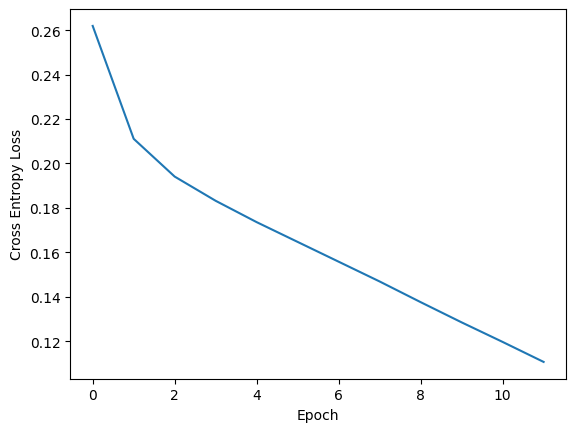

In [2]:
liszt = [0.2619, 0.2111, 0.1941, 0.1832, 0.1736, 0.1647, 0.1558, 0.1469, 0.1376,0.1285, 0.1197, 0.1107]
plt.plot(liszt)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')

# Validation Loop

In [4]:
model = torch.load("/content/drive/My Drive/Machine Learning/COSMOS/FINAL_PROJECT/DER/tmodel.pt")
model.eval()

predicts = []
corrects = []

index = 0

for tweet, emotion in data_loader:
  tweet = tweet.cuda()
  emotion = emotion.cuda()
  text_lengths = []
  for j in range(b_size):
    goddamn = False
    for k in range(MXLEN):
      if tweet[j][k] == 0:
        text_lengths.append(k)
        goddamn = True
        break
    if goddamn == False:
      text_lengths.append(MXLEN)
  emotion_ = torch.nn.functional.one_hot(emotion.to(torch.int64), 5).to(torch.float)
  emotion_ = emotion_.squeeze(1)
  with torch.no_grad():
    y_pred = model(tweet, text_lengths)
  prediction = y_pred.argmax(dim=1)
  predicts.append(prediction.item())
  corrects.append(emotion.item())

  if index < 5:
    print(text)
    print(prediction.item())

  index += 1

confucian = metrics.confusion_matrix(corrects, predicts)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confucian, display_labels = mapping)
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax = ax)
plt.show()

AttributeError: Can't get attribute 'LSTM_Classifier' on <module '__main__'>